# Creating the face image dataset

Create a dataset of (identity-> faces) to simulate an image database of a company's employees:

- **LFW Poeple** dataset from `scikit_learn` simulates a database of tightly cropped and preprocessed faces of the company's employess, ready for embedding.

- The **orignal LFW** dataset (version `lfw_funneled.tgz`) which contains wider images (faces plus some context and background), simulating images coming from facial camera feeds to login on the company's computers or get inside high-level entrance buildings. These images will undergo the full application's pipeline from face detection until indenity recognition and entrance clearance. 

In [1]:
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
from sklearn.datasets import fetch_lfw_people

# fetch LFW People dataset from scikit learn's server 
dataset = fetch_lfw_people(min_faces_per_person=10)

In [4]:
# now we need to create the database of images for each employee's identity
# we keep only 10 images per person

people_names = dataset.target_names
people_ids   = dataset.target
nb_employees = len(people_names)
images = dataset.images                  # shape: (n_samples, h, w)

print('there are {} employess in this company.'.format(nb_employees))
print('the total number of images in the dataset is: {}, but we kept only 10 per person, making a total of {} images.'.format(images.shape[0], nb_employees*10))
print('image shape: ', images[0].shape)  # shape: (h, w)

# step 1: organize and group the images by name in a dict of the form: saved_images= {'id': [images] }

# dict to count the nb of images per each person 
counts = {}
for id in range(nb_employees):
    counts[str(id)] = 0

# dict to save the indices of the chosen images for each person
saved_images = {}
for id in range(nb_employees):
    saved_images[str(id)] = []

sample_idx = 0
for image in images:

    # extract the person's id and name associated with this image
    id = people_ids[sample_idx]
    name = name = people_names[id]

    # check if we reached the 10-image cap for this person
    if counts[str(id)] < 10:

        # save this image's index
        saved_images[str(id)].append(sample_idx) 

        # increase the image count
        counts[str(id)] += 1
    
    sample_idx += 1

there are 158 employess in this company.
the total number of images in the dataset is: 4324, but we kept only 10 per person, making a total of 1580 images.
image shape:  (62, 47)


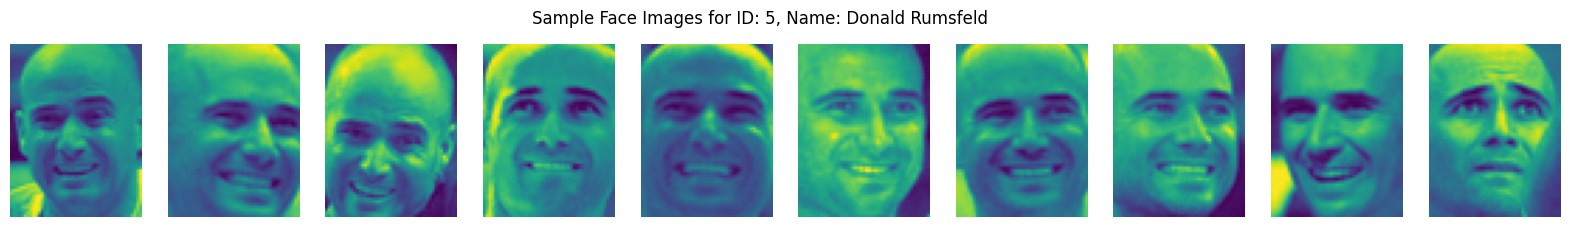

In [5]:
# let's inspect some of the images we saved in our dataset
# we show the 10 saved images for the person with the id=5 as an example

id = 5
fig, axes = plt.subplots(1, 10, figsize=(20, 2.5))  # 1 row, 10 columns
fig.suptitle("Sample Face Images for ID: {}, Name: {}".format(id, name))

for i in range(10):
    sample_idx = saved_images[str(id)][i]
    name = people_names[id]
    img_sample = dataset.images[sample_idx]
    axes[i].imshow(img_sample)
    axes[i].axis('off')


plt.show()

In [6]:
# step 2: save the images in a dataset folder named "employee_faces"

# create the root folder
dataset_dir = r"data\employee_faces"
os.makedirs(dataset_dir, exist_ok=True) 

for id, image_indices in saved_images.items():

    # create a folder for the current id
    folder_name = id
    if not os.path.isdir(os.path.join(dataset_dir, folder_name)):
        os.makedirs(os.path.join(dataset_dir, folder_name))

    # save the images of the current id in the corresponding folder
    for image_idx in image_indices:

        # convert the image from floats to the correct scale
        img_uint8 = (dataset.images[image_idx] * 255).astype('uint8') 

        # save the image
        image_name = 'img_{}.png'.format(str(image_idx))
        cv2.imwrite(os.path.join(dataset_dir, folder_name, image_name), img_uint8)

print('Images are successfully saved to the dataset folder.')        


Images are successfully saved to the dataset folder.
